In [2]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [3]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [4]:
cat_DIC = col.search(variable_id= 'dissic', experiment_id= 'piControl')
cat_DIC.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'CESM2',
       'CESM2-WACCM', 'CanESM5-CanOE', 'CanESM5', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'GISS-E2-1-G-CC', 'GISS-E2-1-G',
       'MIROC-ES2L', 'NorESM1-F', 'CESM2-WACCM-FV2', 'CESM2-FV2',
       'ACCESS-ESM1-5', 'UKESM1-0-LL', 'MRI-ESM2-0', 'KIOST-ESM',
       'NorESM2-LM', 'CMCC-ESM2', 'IPSL-CM5A2-INCA'], dtype=object)

In [5]:
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
DICdict = cat_DIC.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)
DICdict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found
MIROC-ES2L: No units found


{'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Omon/dissic/gn/v20190319/.nan.20190319': <xarray.Dataset>
 Dimensions:      (bnds: 2, lev: 75, time: 3000, vertex: 4, x: 362, y: 332)
 Coordinates:
     lat_bounds   (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
     lon_bounds   (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
     lat          (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
     lon          (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
   * lev          (lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
     lev_bounds   (lev, bnds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
   * time         (time) object 1850-01-16 12:00:00 ... 2099-12-16 12:00:00
     time_bounds  (time, bnds) object dask.array<chunksize=(3000, 2), meta=np.ndarray>
   * bnds         (bnds) int64 0 1
   * vertex       (ver

In [6]:
a = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gr/v20210118/.nan.20210118'
b = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/dissic/gn/v20190429/.nan.20190429'
c = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/dissic/gn/v20190710/.nan.20190710'
e = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/dissic/gn/v20190429/.nan.20190429'
f = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Oyr/dissic/gr/v20180701/.nan.20180701'
g = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Oyr/dissic/gn/v20191214/.nan.20191214'
h = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/dissic/gn/v20200326/.nan.20200326'
k = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Omon/dissic/gn/v20190429/.nan.20190429'
l = 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/dissic/gn/v20190627/.nan.20190627'
m = 'CMIP.MPI-M.MPI-ESM1-2-HR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/dissic/gn/v20190710/.nan.20190710'
n = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/dissic/gn/v20190429/.nan.20190429'
o = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Omon/dissic/gn/v20190319/.nan.20190319'
p = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.dissic.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Omon/dissic/gr/v20180701/.nan.20180701'
q = 'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Oyr/dissic/gr/v20190920/.nan.20190920'
r = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Oyr/dissic/gn/v20190429/.nan.20190429'
s = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r2i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/dissic/gn/v20190815/.nan.20190815'
u = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/dissic/gn/v20190823/.nan.20190823'
v = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Omon/dissic/gn/v20191214/.nan.20191214'
aa = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Oyr/dissic/gn/v20190429/.nan.20190429'
bb = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gr/v20210118/.nan.20210118'
cc = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gn/v20210118/.nan.20210118'
ee = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Omon.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Omon/dissic/gr/v20210118/.nan.20210118'
ff = 'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Omon/dissic/gn/v20190920/.nan.20190920'
gg = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.dissic.gr1.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/dissic/gr1/v20200731/.nan.20200731'


In [23]:
DICa = DICdict[a].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICb = DICdict[b].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICc = DICdict[c].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICe = DICdict[e].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICf = DICdict[f].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICg = DICdict[g].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICh = DICdict[h].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICk = DICdict[k].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICl = DICdict[l].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICm = DICdict[m].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICn = DICdict[n].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICo = DICdict[o].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICp = DICdict[p].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICq = DICdict[q].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICr = DICdict[r].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICs = DICdict[s].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICu = DICdict[u].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICv = DICdict[v].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICaa = DICdict[aa].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICbb = DICdict[bb].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICcc = DICdict[cc].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICee = DICdict[ee].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICff = DICdict[ff].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICgg = DICdict[gg].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)

KeyError: 'lev'

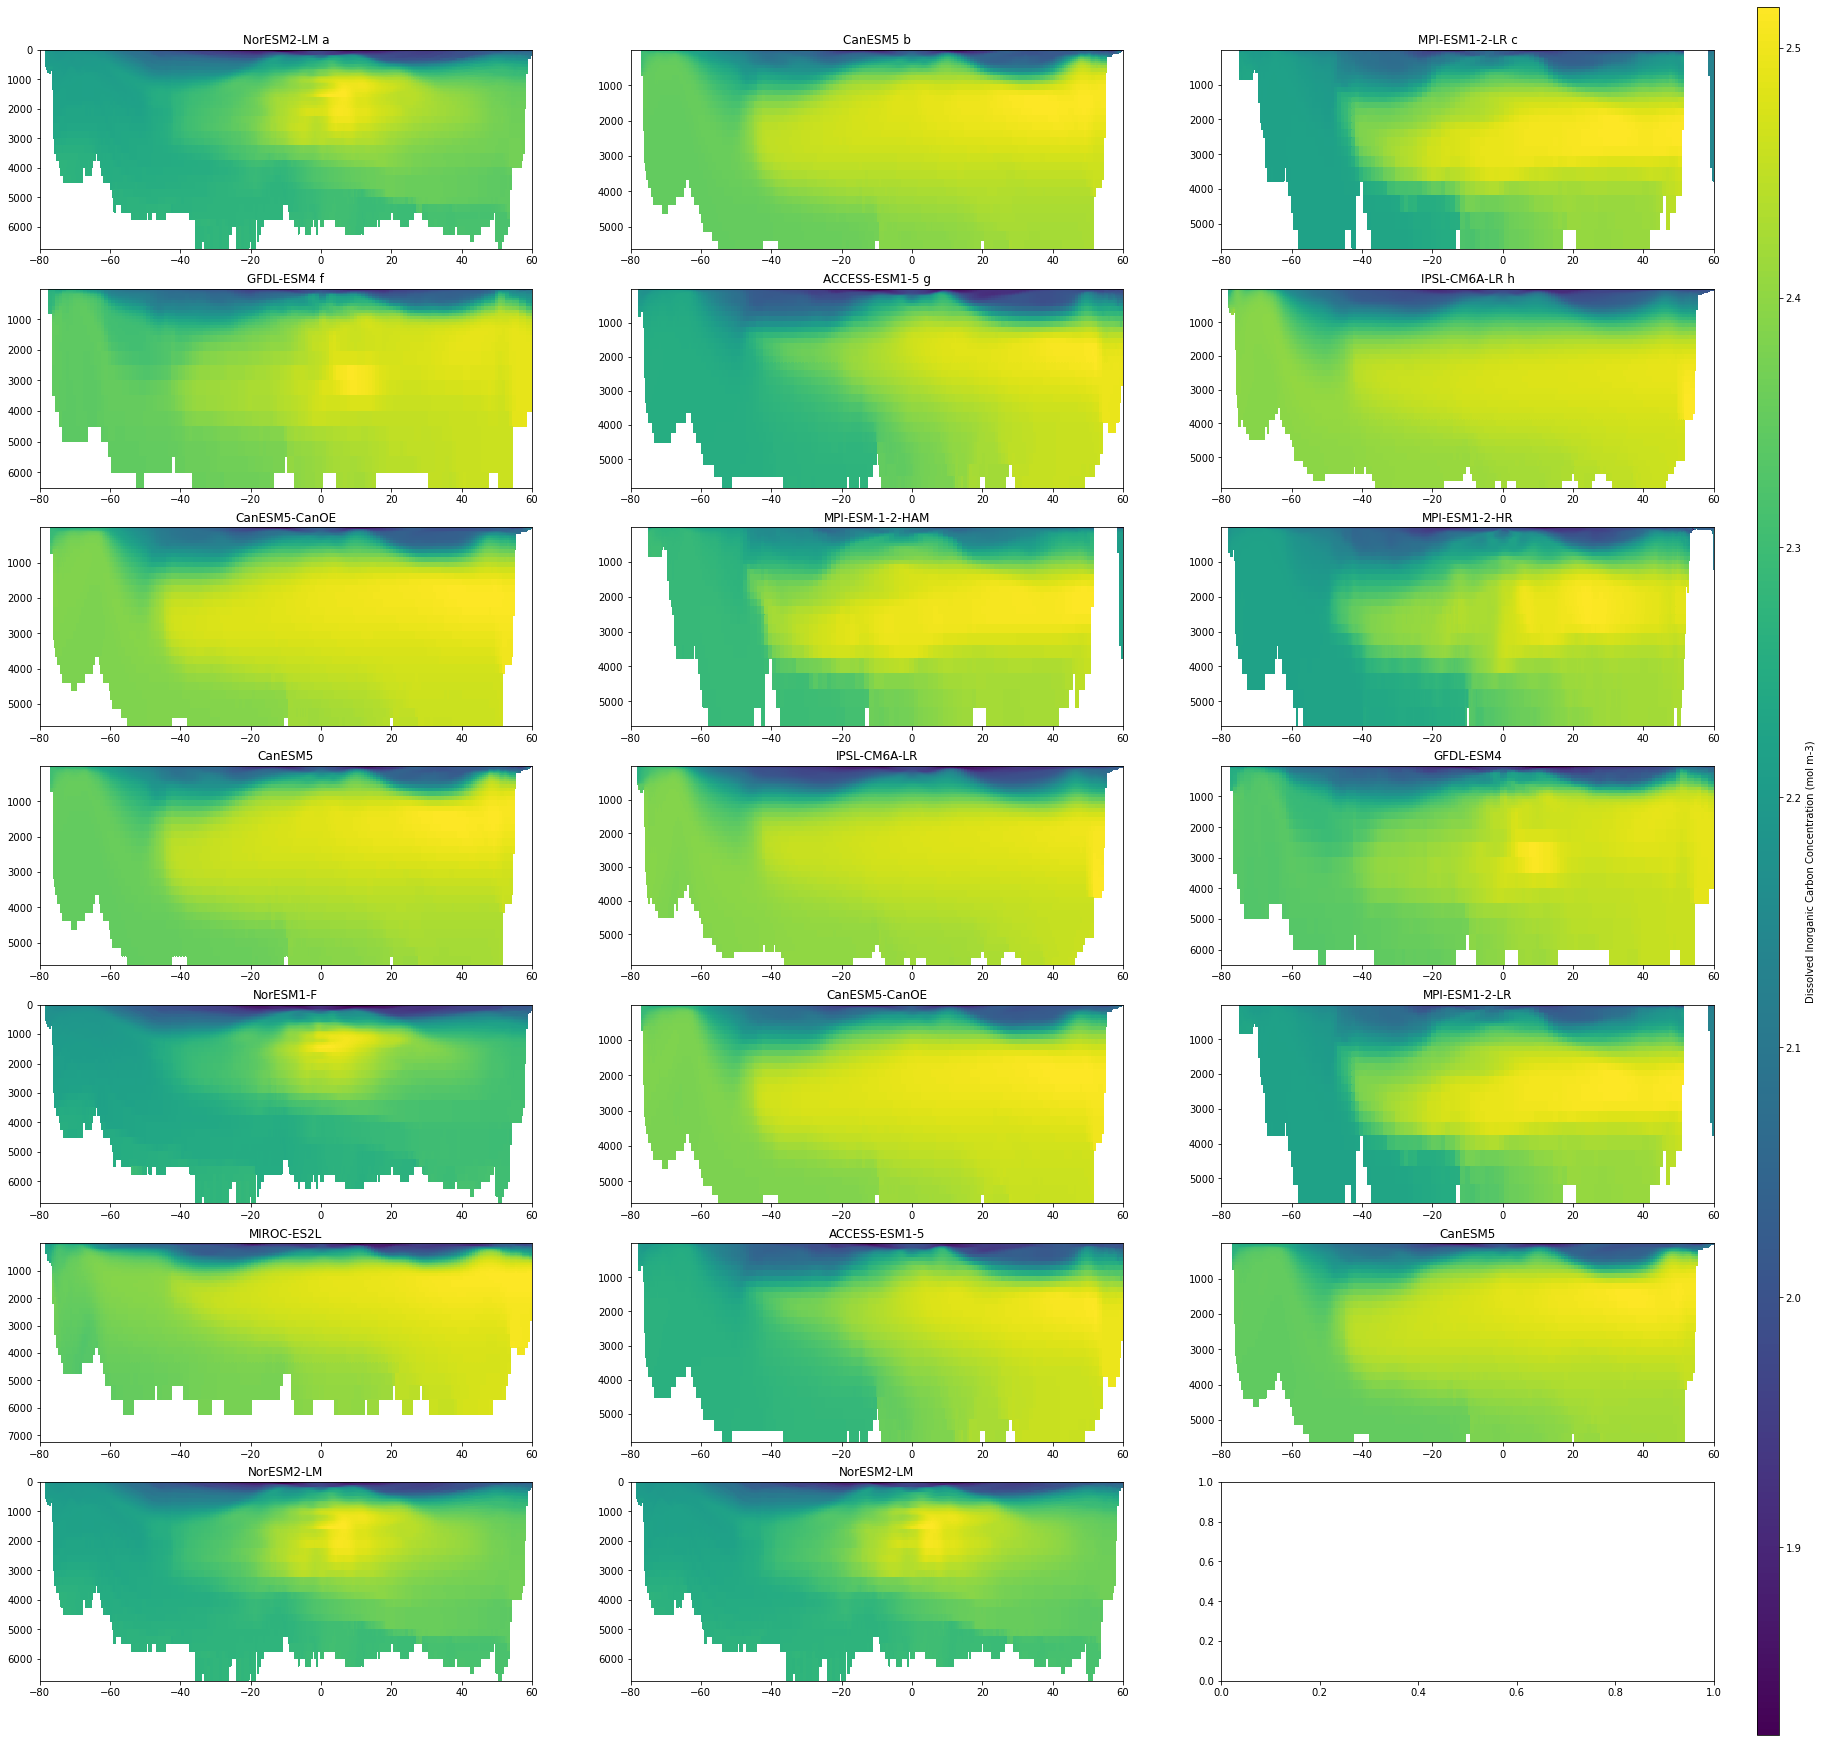

In [25]:
# ax = ((axa, axb, axc), (axf, axg, axh), (axg, axk, axl), (axm, axn, axo), (axp, axq, axr), (axs, axu, axv))
figa, ((axa, axb, axc), (axf, axg, axh), (axk, axl, axm), (axn, axo, axp), (axq, axr, axs), (axu, axv, axaa), (axbb, axee, axff)) = plt.subplots(nrows = 7,ncols = 3, figsize=[30, 30])
ima = axa.pcolormesh(DICa['y'],DICa['lev'],DICa.dissic)
axa.set_xlim([-80,60])
axa.invert_yaxis()
cbaxes = figa.add_axes([0.92, 0.1, 0.01, 0.8]) 
cbara = figa.colorbar(ima, cax = cbaxes)
cbara.set_label(DICa.dissic.attrs['long_name']+' ('+DICa.dissic.attrs['units']+')')
axa.set_title(DICa.attrs['source_id']+' a')

imb = axb.pcolormesh(DICb['y'],DICb['lev'],DICb.dissic)
axb.set_xlim([-80,60])
axb.invert_yaxis()
axb.set_title(DICb.attrs['source_id']+' b')

imc = axc.pcolormesh(DICc['y'],DICc['lev'],DICc.dissic)
axc.set_xlim([-80,60])
axc.invert_yaxis()
axc.set_title(DICc.attrs['source_id']+' c')

# This is a duplicate of a
#fige, axE = plt.subplots(figsize=[10,3])
# ime = axE.pcolormesh(DICe['y'],DICe['lev'],DICe.dissic)
# axE.set_xlim([-80,60])
# axE.invert_yaxis()
# # cbare = plt.colorbar(ima)
# # cbare.set_label(DICe.dissic.attrs['long_name']+'\n('+DICe.dissic.attrs['units']+')')
# axE.set_title(DICe.attrs['source_id'])

imf = axf.pcolormesh(DICf['y'],DICf['lev'],DICf.dissic)
axf.set_xlim([-80,60])
axf.invert_yaxis()
axf.set_title(DICf.attrs['source_id']+ ' f')

img = axg.pcolormesh(DICg['y'],DICg['lev'],DICg.dissic)
axg.set_xlim([-80,60])
axg.invert_yaxis()
axg.set_title(DICg.attrs['source_id']+' g')

imh = axh.pcolormesh(DICh['y'],DICh['lev'],DICh.dissic)
axh.set_xlim([-80,60])
axh.invert_yaxis()
axh.set_title(DICh.attrs['source_id']+' h')

imk = axk.pcolormesh(DICk['y'],DICk['lev'],DICk.dissic)
axk.set_xlim([-80,60])
axk.invert_yaxis()
axk.set_title(DICk.attrs['source_id'])

iml = axl.pcolormesh(DICl['y'],DICl['lev'],DICl.dissic)
axl.set_xlim([-80,60])
axl.invert_yaxis()
axl.set_title(DICl.attrs['source_id'])

imm = axm.pcolormesh(DICm['y'],DICm['lev'],DICm.dissic)
axm.set_xlim([-80,60])
axm.invert_yaxis()
axm.set_title(DICm.attrs['source_id'])

imn = axn.pcolormesh(DICn['y'],DICn['lev'],DICn.dissic)
axn.set_xlim([-80,60])
axn.invert_yaxis()
axn.set_title(DICn.attrs['source_id'])

imo = axo.pcolormesh(DICo['y'],DICo['lev'],DICo.dissic)
axo.set_xlim([-80,60])
axo.invert_yaxis()
axo.set_title(DICo.attrs['source_id'])

imp = axp.pcolormesh(DICp['y'],DICp['lev'],DICp.dissic)
axp.set_xlim([-80,60])
axp.invert_yaxis()
axp.set_title(DICp.attrs['source_id'])

imq = axq.pcolormesh(DICq['y'],DICq['lev'],DICq.dissic)
axq.set_xlim([-80,60])
axq.invert_yaxis()
axq.set_title(DICq.attrs['source_id'])

imr = axr.pcolormesh(DICr['y'],DICr['lev'],DICr.dissic)
axr.set_xlim([-80,60])
axr.invert_yaxis()
axr.set_title(DICr.attrs['source_id'])

ims = axs.pcolormesh(DICs['y'],DICs['lev'],DICs.dissic)
axs.set_xlim([-80,60])
axs.invert_yaxis()
axs.set_title(DICs.attrs['source_id'])

imu = axu.pcolormesh(DICu['y'],DICu['lev'],DICu.dissic)
axu.set_xlim([-80,60])
axu.invert_yaxis()
axu.set_title(DICu.attrs['source_id'])

imv = axv.pcolormesh(DICv['y'],DICv['lev'],DICv.dissic)
axv.set_xlim([-80,60])
axv.invert_yaxis()
axv.set_title(DICv.attrs['source_id'])

imaa = axaa.pcolormesh(DICaa['y'],DICaa['lev'],DICaa.dissic)
axaa.set_xlim([-80,60])
axaa.invert_yaxis()
axaa.set_title(DICaa.attrs['source_id'])

imbb = axbb.pcolormesh(DICbb['y'],DICbb['lev'],DICbb.dissic)
axbb.set_xlim([-80,60])
axbb.invert_yaxis()
axbb.set_title(DICbb.attrs['source_id'])

# imcc = axcc.pcolormesh(DICcc['y'],DICcc['lev'],DICcc.dissic)
# axcc.set_xlim([-80,60])
# axcc.invert_yaxis()
# axcc.set_title(DICcc.attrs['source_id'])

imee = axee.pcolormesh(DICee['y'],DICee['lev'],DICee.dissic)
axee.set_xlim([-80,60])
axee.invert_yaxis()
axee.set_title(DICee.attrs['source_id'])

imff = axff.pcolormesh(DICff['y'],DICff['lev'],DICff.dissic)
axff.set_xlim([-80,60])
axff.invert_yaxis()
axff.set_title(DICff.attrs['source_id'])

# imgg = axgg.pcolormesh(DICgg['y'],DICgg['lev'],DICgg.dissic)
# axgg.set_xlim([-80,60])
# axgg.invert_yaxis()
# axgg.set_title(DICgg.attrs['source_id'])



